# Introduction and Business Problem

**Introduction:**
- The city of Bangalore, India is known as the Garden city but it is packed with restaurants, night life and amazing people. For people that are new to Bangalore, it can be daunting to figure out what restaurants are worth going to and where they are.  For people who are in Bangalore or visiting Bangalore, how do you know what the best places are to get something to eat based on your taste? How do you make a choice on which place will serve your hunger better?
    
    
    
**Business Problem:**
- For this project, I am going to put on my entrepreneur hat and create a simple guide on where to eat based on Foursquare ratings, price, category and geographic location data for restaurants in Bangalore.  I will then cluster these restaurants based on their similarities so that a user can easily determine what type cuisine they are looking for.   

# Data Required

For this assignment, I will be utilizing the Foursquare API to pull the following location data on restaurants in Bangalore:
- Venue Name
- Venue ID
- Venue Location
- Venue Category
- Count of Likes

# Data Acquisition Approach

To acquire the data mentioned above, I will need to do the following:

- Get geolocator lat and long coordinates for Bangalore, India
- Get a list of all venues in Bangalore
- Get venue IDs for each venue in Bangalore
- Pull venue name, location, category, rating, price, count of likes and phrases for each venue

# Data Usage Approach - Clustering

I will take the gathered data (see above in Data Acquisition Approach and Data Required sections) and will create a k-means clustering algorithm that groups restaurants into 4-5 clusters so that people looking to eat in Bangalore can easily see which restaurants will cater to their needs.

# Data Prep and Pull

We will import our necessary packages and start pulling our data for data prep and usage.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

#import beautiful soup
from urllib.request import urlopen
from bs4 import BeautifulSoup


print('Libraries imported.')

Libraries imported.


# Adding the geo data for Bangalore

Let's find the geographic data for Bangalore so we can pull it from FourSquare.

In [2]:
latitude=12.9716
longitude=77.5946
print('The geograpical coordinates of Bangalore are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Bangalore are 12.9716, 77.5946.


# FourSquare Part 2

Creating a URL for all of the venues in Bangalore

In [3]:
# @hidden_cell

CLIENT_ID = 'HQCLNXBBJO1Q2OCKHDCNVHPNVUO45IQS334R3OWTY5FIKF2Y' # your Foursquare ID
CLIENT_SECRET = '4HH3ASEY5XWOLIXKHQCFAXI0D3DJST3BZSGEQ1ATBIASQCMQ' # your Foursquare Secret
VERSION = '20200524' # Foursquare API version

In [4]:
LIMIT = 300 # limit of number of venues returned by Foursquare API
radius = 800 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)

# FourSquare Part 3

Pulling the JSON for the URL of venues.

In [5]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ece462eb57e88001b05717a'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Bangalore',
  'headerFullLocation': 'Bangalore',
  'headerLocationGranularity': 'city',
  'totalResults': 114,
  'suggestedBounds': {'ne': {'lat': 12.978800007200007,
    'lng': 77.60197475708969},
   'sw': {'lat': 12.964399992799994, 'lng': 77.5872252429103}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '51d1245e498ef93fd0e713bb',
       'name': 'JW Marriott Hotel Bengaluru',
       'location': {'address': '24/1 Vittal Mallya Road',
        'lat': 12.972361772490226,
        'lng': 77.59505132638924,
        'labeledLatLngs': [{'label': 'display',
          'lat': 12

# Foursquare Part 4

Now we start pulling the data from Foursquare into a dataframe so we can manipulate and use it.

In [6]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [7]:
#pull the actual data from the Foursquare API

venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
filtered_columns = ['venue.name', 'venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues

<ipython-input-7-ca69fef7a6c6>:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues)


,venue.name,venue.id,venue.categories,venue.location.lat,venue.location.lng
0,JW Marriott Hotel Bengaluru,51d1245e498ef93fd0e713bb,Hotel,12.972362,77.595051
1,UB City,4bcd805cfb84c9b61512223e,Shopping Mall,12.971709,77.595905
2,Toscano,4bc1cd90b492d13a4e74a660,Italian Restaurant,12.971980,77.596066
3,Shiro,4b895510f964a520442c32e3,Japanese Restaurant,12.971900,77.596236
4,Café Noir,4baef172f964a5202ce33be3,French Restaurant,12.971995,77.596001
5,Skyye,4d23471ed7b0b1f7d0552c9f,Lounge,12.971646,77.596242
6,Spice Terrace,528f734f11d24f6d2c578d31,Lounge,12.972254,77.595200
7,Bliss Luxe Chocolate Lounge,4c8b8c31a92fa093fe789bbf,Cupcake Shop,12.971525,77.596201
8,J W Kitchen,523de40611d2996a150886fc,Asian Restaurant,12.972410,77.594592
9,Bengaluru Baking Co.,51efe570498e01081549f692,Bakery,12.971761,77.595128


In [8]:
#fix the column names so they look relatively normal

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,id,categories,lat,lng
0,JW Marriott Hotel Bengaluru,51d1245e498ef93fd0e713bb,Hotel,12.972362,77.595051
1,UB City,4bcd805cfb84c9b61512223e,Shopping Mall,12.971709,77.595905
2,Toscano,4bc1cd90b492d13a4e74a660,Italian Restaurant,12.971980,77.596066
3,Shiro,4b895510f964a520442c32e3,Japanese Restaurant,12.971900,77.596236
4,Café Noir,4baef172f964a5202ce33be3,French Restaurant,12.971995,77.596001
5,Skyye,4d23471ed7b0b1f7d0552c9f,Lounge,12.971646,77.596242
6,Spice Terrace,528f734f11d24f6d2c578d31,Lounge,12.972254,77.595200
7,Bliss Luxe Chocolate Lounge,4c8b8c31a92fa093fe789bbf,Cupcake Shop,12.971525,77.596201
8,J W Kitchen,523de40611d2996a150886fc,Asian Restaurant,12.972410,77.594592
9,Bengaluru Baking Co.,51efe570498e01081549f692,Bakery,12.971761,77.595128


In [9]:
# find a list of unique categories from the API so we can see what may or may not fit for restaurants

nearby_venues['categories'].unique()

array(['Hotel', 'Shopping Mall', 'Italian Restaurant',
       'Japanese Restaurant', 'French Restaurant', 'Lounge',
       'Cupcake Shop', 'Asian Restaurant', 'Bakery', 'Clothing Store',
       'Deli / Bodega', 'Furniture / Home Store', 'Cocktail Bar',
       'Brewery', 'Boutique', 'Mexican Restaurant', 'Art Gallery',
       'Ice Cream Shop', 'Park', 'Breakfast Spot', 'Pub',
       'Indian Restaurant', 'Burger Joint', 'Fried Chicken Joint',
       'Coffee Shop', 'Sushi Restaurant', 'Parsi Restaurant', 'Spa',
       'Restaurant', 'Arts & Crafts Store', 'Mediterranean Restaurant',
       'Café', 'Motorcycle Shop', 'Arcade', 'Wine Bar',
       'Gym / Fitness Center', 'Track Stadium', 'Bubble Tea Shop',
       'Athletics & Sports', 'Seafood Restaurant',
       'South Indian Restaurant', 'Stadium', 'Chinese Restaurant',
       'Karnataka Restaurant', 'Bar', 'Rajasthani Restaurant',
       'Vegetarian / Vegan Restaurant', 'Dessert Shop',
       'Electronics Store', 'Bistro', 'Plaza', 'Concer

In [38]:
removal_list = ['Hotel', 'Shopping Mall','Lounge', 'Cupcake Shop', 'Clothing Store', 'Deli / Bodega', 'Furniture / Home Store',
                'Boutique', 'Art Gallery', 'Park', 'Arts & Crafts Store', 'Motorcycle Shop', 'Arcade', 'Gym / Fitness Center',
                'Stadium', 'Athletics & Sports', 'Spa', 'Track Stadium','Electronics Store',
                'Concert Hall', 'Plaza', 'Science Museum', 'Tennis Stadium', 'Nightclub']

nearby_venues2 = nearby_venues.copy()


#getting a clear dataframe of just restaurants
nearby_venues2 = nearby_venues2[~nearby_venues2['categories'].isin(removal_list)]
nearby_venues2

,name,id,categories,lat,lng
2,Toscano,4bc1cd90b492d13a4e74a660,Italian Restaurant,12.971980,77.596066
3,Shiro,4b895510f964a520442c32e3,Japanese Restaurant,12.971900,77.596236
4,Café Noir,4baef172f964a5202ce33be3,French Restaurant,12.971995,77.596001
8,J W Kitchen,523de40611d2996a150886fc,Asian Restaurant,12.972410,77.594592
9,Bengaluru Baking Co.,51efe570498e01081549f692,Bakery,12.971761,77.595128
14,Margarita Lounge Bar,53b80bcc498ed9a71ea89302,Cocktail Bar,12.970741,77.597553
15,The Biere Club,4dd3f3d27d8b6704c7b0ddde,Brewery,12.971061,77.597657
17,Sunny's,4bebb117b3352d7fefc656d2,Italian Restaurant,12.972023,77.598454
19,Sanchez,589f63b8110d0313496f16d9,Mexican Restaurant,12.972018,77.596025
21,Corner House,4bfd513fe9309521040962ab,Ice Cream Shop,12.972979,77.599971


# Foursquare Part 5

Now let's get a list of venue ids so we can pull likes and add to our dataframe.

In [39]:
#let's get a list of venues

venue_id_list = nearby_venues2['id'].tolist()
venue_id_list

['4bc1cd90b492d13a4e74a660',
 '4b895510f964a520442c32e3',
 '4baef172f964a5202ce33be3',
 '523de40611d2996a150886fc',
 '51efe570498e01081549f692',
 '53b80bcc498ed9a71ea89302',
 '4dd3f3d27d8b6704c7b0ddde',
 '4bebb117b3352d7fefc656d2',
 '589f63b8110d0313496f16d9',
 '4bfd513fe9309521040962ab',
 '4bb59ca0f562ef3bd3262f97',
 '52136774bce6d23454ea87db',
 '4bb224ccf964a52010bd3ce3',
 '4bd446b341b9ef3b27a801e6',
 '4d026595e5f16ea8adc4aa28',
 '4b759767f964a520b4162ee3',
 '524c709211d27c7b392a7897',
 '4b97ad0bf964a5200c0f35e3',
 '4bbcbd9407809521edadd991',
 '4c4293173735be9a49551aa4',
 '55351347498e151e387373fd',
 '4fe1cab3e4b079e195f1fdb1',
 '4ba5d1eef964a5200f2439e3',
 '5223435a11d2f93a6026432a',
 '4bc55ec741cb76b0e5553e6f',
 '53480aea498ecf9ff5a85bd1',
 '525e363211d2be5d7f023d0d',
 '4c5c19a29b28d13a47c55570',
 '532a5bd611d2652e7d6a6e4a',
 '5080ddc0e4b093287af8e279',
 '50bf61e5e4b05b9d6aeb2f16',
 '4c6d3917e6b7b1f70709a98e',
 '4d1ee872dd6a236a55c82b38',
 '4bfaab6f328d76b0dbd814ec',
 '541ff4ca498e

In [40]:
#set up to pull the likes from the API based on venue ID

url_list = []
like_list = []
json_list = []

for venue_id in venue_id_list:
    venue_url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    url_list.append(venue_url)
for link in url_list:
    result = requests.get(link).json()
    likes = result['response']['likes']['count']
    like_list.append(likes)
print(like_list)

[127, 140, 163, 43, 9, 12, 360, 85, 6, 59, 230, 134, 15, 266, 11, 80, 15, 48, 34, 54, 77, 7, 45, 6, 14, 13, 6, 28, 17, 15, 37, 13, 11, 11, 8, 14, 8, 136, 6, 11, 7, 10, 13, 9, 4, 26, 7, 9, 4, 0, 19, 20, 19, 2, 0, 0, 8, 16, 6, 5, 17, 6, 12, 5]


In [41]:
#double check that we did not lose any venues based on if likes were available

print(len(like_list))
print(len(venue_id_list))

64
64


# Data Preparation Introduction

The thought process behind this is that likes are a proxy for quality.  The more likes there are, the better the restaurant is.  This might be incorrect but API call issues (how many I can use for free) holds me back from getting price / rating data.  I will then bin this data into a quality categorical variables so we can cluster appropriately.

I am also going to create new categorical variables for the restaurants to better group them based on type of cuisine.  This way you can look for good mexican food or now what type of food might be best to eat in Bangalore if you are new to the area.

# Data Preparation Part 1

Now let's start prepping our data for clustering.  This will include combining data from different lists, creating new categorical data to be used, binning data and then encoding the data for clustering.

In [42]:
#let's make a copy of our initial dataframe just in case anything goes wrong

bangalore_venues = nearby_venues2.copy()
bangalore_venues.head()

,name,id,categories,lat,lng
2,Toscano,4bc1cd90b492d13a4e74a660,Italian Restaurant,12.971980,77.596066
3,Shiro,4b895510f964a520442c32e3,Japanese Restaurant,12.971900,77.596236
4,Café Noir,4baef172f964a5202ce33be3,French Restaurant,12.971995,77.596001
8,J W Kitchen,523de40611d2996a150886fc,Asian Restaurant,12.972410,77.594592
9,Bengaluru Baking Co.,51efe570498e01081549f692,Bakery,12.971761,77.595128


# Data Preparation Part 2

Let's combine our list of likes into our dataframe

In [43]:
# add in the list of likes

bangalore_venues['total likes'] = like_list
bangalore_venues.head()

,name,id,categories,lat,lng,total likes
2,Toscano,4bc1cd90b492d13a4e74a660,Italian Restaurant,12.971980,77.596066,127
3,Shiro,4b895510f964a520442c32e3,Japanese Restaurant,12.971900,77.596236,140
4,Café Noir,4baef172f964a5202ce33be3,French Restaurant,12.971995,77.596001,163
8,J W Kitchen,523de40611d2996a150886fc,Asian Restaurant,12.972410,77.594592,43
9,Bengaluru Baking Co.,51efe570498e01081549f692,Bakery,12.971761,77.595128,9


# Data Prep 3
Let's look at our like data to set bins

In [44]:
# now let's bin total likes

print(bangalore_venues['total likes'].max())
print(bangalore_venues['total likes'].min())
print(bangalore_venues['total likes'].median())
print(bangalore_venues['total likes'].mean())

360
0
13.0
40.59375


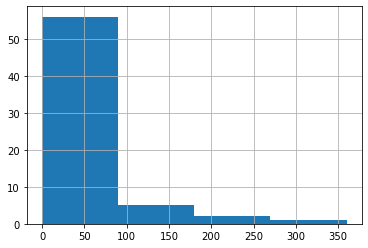

In [45]:
# let's visualize our total likes based on a histogram

import matplotlib.pyplot as plt
bangalore_venues['total likes'].hist(bins=4)
plt.show()

In [46]:
# what are the bins we want to use?

print(np.percentile(bangalore_venues['total likes'], 25))
print(np.percentile(bangalore_venues['total likes'], 50))
print(np.percentile(bangalore_venues['total likes'], 75))

7.0
13.0
38.5


In [33]:
# now we have our bin values so let's set them to the appropriate values
# less than 7, 7-13, 13-38.5, 38.5>
# poor, below avg, abv avg, great

poor = bangalore_venues['total likes']<=7
below_avg = bangalore_venues[(bangalore_venues['total likes']>7) & (bangalore_venues['total likes']<=13)]
abv_avg = bangalore_venues[(bangalore_venues['total likes']>13) & (bangalore_venues['total likes']<=38.5)]
great = bangalore_venues['total likes']>38.5



In [47]:
# let's set up a function that will re-categorize our restaurants based on likes

def conditions(s):
    if s['total likes']<=7:
        return 'poor'
    if s['total likes']<=13:
        return 'below avg'
    if s['total likes']<=38.5:
        return 'above avg'
    if s['total likes']>38.5:
        return 'great'

bangalore_venues['total likes_cat']=bangalore_venues.apply(conditions, axis=1)
bangalore_venues

,name,id,categories,lat,lng,total likes,total likes_cat
2,Toscano,4bc1cd90b492d13a4e74a660,Italian Restaurant,12.971980,77.596066,127,great
3,Shiro,4b895510f964a520442c32e3,Japanese Restaurant,12.971900,77.596236,140,great
4,Café Noir,4baef172f964a5202ce33be3,French Restaurant,12.971995,77.596001,163,great
8,J W Kitchen,523de40611d2996a150886fc,Asian Restaurant,12.972410,77.594592,43,great
9,Bengaluru Baking Co.,51efe570498e01081549f692,Bakery,12.971761,77.595128,9,below avg
14,Margarita Lounge Bar,53b80bcc498ed9a71ea89302,Cocktail Bar,12.970741,77.597553,12,below avg
15,The Biere Club,4dd3f3d27d8b6704c7b0ddde,Brewery,12.971061,77.597657,360,great
17,Sunny's,4bebb117b3352d7fefc656d2,Italian Restaurant,12.972023,77.598454,85,great
19,Sanchez,589f63b8110d0313496f16d9,Mexican Restaurant,12.972018,77.596025,6,poor
21,Corner House,4bfd513fe9309521040962ab,Ice Cream Shop,12.972979,77.599971,59,great


In [48]:
# let's star the process for re-categorizing the categories

bangalore_venues['categories'].unique()

array(['Italian Restaurant', 'Japanese Restaurant', 'French Restaurant',
       'Asian Restaurant', 'Bakery', 'Cocktail Bar', 'Brewery',
       'Mexican Restaurant', 'Ice Cream Shop', 'Breakfast Spot', 'Pub',
       'Indian Restaurant', 'Burger Joint', 'Fried Chicken Joint',
       'Coffee Shop', 'Sushi Restaurant', 'Parsi Restaurant',
       'Restaurant', 'Mediterranean Restaurant', 'Café', 'Wine Bar',
       'Bubble Tea Shop', 'Seafood Restaurant', 'South Indian Restaurant',
       'Chinese Restaurant', 'Karnataka Restaurant', 'Bar',
       'Rajasthani Restaurant', 'Vegetarian / Vegan Restaurant',
       'Dessert Shop', 'Bistro', 'Sandwich Place', 'Pizza Place',
       'Cantonese Restaurant', 'Middle Eastern Restaurant', 'Juice Bar'],
      dtype=object)

In [57]:
# let's create our new categories and create a function to apply those to our existing data


bars = ['Cocktail Bar', 'Brewery', 'Pub', 'Bar','Wine Bar']
other = ['Bakery', 'Coffee Shop', 'Bubble Tea Shop', 'Sandwich Place',
         'Ice Cream Shop', 'Juice Bar', 'Restaurant', 'Café', 'Dessert Shop', 'Bistro']
european_food = ['French Restaurant', 'Mediterranean Restaurant']
asian_food = ['Japanese Restaurant', 'Asian Restaurant','Sushi Restaurant','Parsi Restaurant',
                    'Middle Eastern Restaurant']
indian_food = ['Breakfast Spot', 'Indian Restaurant', 'South Indian Restaurant', 'Karnataka Restaurant', 
               'Rajasthani Restaurant', 'Vegetarian / Vegan Restaurant',]
mexican_food = ['Mexican Restaurant']
american_food = ['Burger Joint', 'American Restaurant', 'Fried Chicken Joint']
italian_food = ['Italian Restaurant', 'Seafood Restaurant', 'Pizza Place']
chinese_food = ['Chinese Restaurant', 'Cantonese Restaurant']

def conditions2(s):
    if s['categories'] in bars:
        return 'Bars and Brewery'
    if s['categories'] in other:
        return 'Miscellaneous'
    if s['categories'] in european_food:
        return 'European Cuisine'
    if s['categories'] in asian_food:
        return 'Asian Cuisine'
    if s['categories'] in indian_food:
        return 'Indian Cuisine'
    if s['categories'] in mexican_food:
        return 'Mexican Cuisine'
    if s['categories'] in american_food:
        return 'American Cuisine'
    if s['categories'] in italian_food:
        return 'Italian Cuisine'
    if s['categories'] in chinese_food:
        return 'Chinese Cuisine'

bangalore_venues['categories_new']=bangalore_venues.apply(conditions2, axis=1)
bangalore_venues

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
2,Toscano,4bc1cd90b492d13a4e74a660,Italian Restaurant,12.971980,77.596066,127,great,Italian Cuisine,3
3,Shiro,4b895510f964a520442c32e3,Japanese Restaurant,12.971900,77.596236,140,great,Asian Cuisine,3
4,Café Noir,4baef172f964a5202ce33be3,French Restaurant,12.971995,77.596001,163,great,European Cuisine,3
8,J W Kitchen,523de40611d2996a150886fc,Asian Restaurant,12.972410,77.594592,43,great,Asian Cuisine,3
9,Bengaluru Baking Co.,51efe570498e01081549f692,Bakery,12.971761,77.595128,9,below avg,Miscellaneous,2
14,Margarita Lounge Bar,53b80bcc498ed9a71ea89302,Cocktail Bar,12.970741,77.597553,12,below avg,Bars and Brewery,2
15,The Biere Club,4dd3f3d27d8b6704c7b0ddde,Brewery,12.971061,77.597657,360,great,Bars and Brewery,3
17,Sunny's,4bebb117b3352d7fefc656d2,Italian Restaurant,12.972023,77.598454,85,great,Italian Cuisine,3
19,Sanchez,589f63b8110d0313496f16d9,Mexican Restaurant,12.972018,77.596025,6,poor,Mexican Cuisine,0
21,Corner House,4bfd513fe9309521040962ab,Ice Cream Shop,12.972979,77.599971,59,great,Miscellaneous,3


# Data Prep Part 4

Now let's create dummy variables for our total likes and categories so we can cluster

In [68]:
# one hot encoding
bangalore_onehot = pd.get_dummies(bangalore_venues[['categories_new', 'total likes_cat']], prefix="", prefix_sep="")

# add name column back to dataframe
bangalore_onehot['Name'] = bangalore_venues['name'] 

# move name column to the first column
fixed_columns = [bangalore_onehot.columns[-1]] + list(bangalore_onehot.columns[:-1])
bangalore_onehot = bangalore_onehot[fixed_columns]

bangalore_onehot.head()

,Name,American Cuisine,Asian Cuisine,Bars and Brewery,Chinese Cuisine,European Cuisine,Indian Cuisine,Italian Cuisine,Mexican Cuisine,Miscellaneous,above avg,below avg,great,poor
2,Toscano,0,0,0,0,0,0,1,0,0,0,0,1,0
3,Shiro,0,1,0,0,0,0,0,0,0,0,0,1,0
4,Café Noir,0,0,0,0,1,0,0,0,0,0,0,1,0
8,J W Kitchen,0,1,0,0,0,0,0,0,0,0,0,1,0
9,Bengaluru Baking Co.,0,0,0,0,0,0,0,0,1,0,1,0,0


# Clustering Part 1

Now let's run our k-means clustering algorithm to get our labels

In [69]:
cluster_df = bangalore_onehot.drop('Name', axis=1)

k_clusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=k_clusters, random_state=0).fit(cluster_df)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 0, 0, 1, 1, 3, 1])

# Clustering Part 2

Let's add our cluster labels back into our original dataframe.

In [70]:
bangalore_venues['label'] = kmeans.labels_
bangalore_venues.head()

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
2,Toscano,4bc1cd90b492d13a4e74a660,Italian Restaurant,12.971980,77.596066,127,great,Italian Cuisine,1
3,Shiro,4b895510f964a520442c32e3,Japanese Restaurant,12.971900,77.596236,140,great,Asian Cuisine,1
4,Café Noir,4baef172f964a5202ce33be3,French Restaurant,12.971995,77.596001,163,great,European Cuisine,1
8,J W Kitchen,523de40611d2996a150886fc,Asian Restaurant,12.972410,77.594592,43,great,Asian Cuisine,1
9,Bengaluru Baking Co.,51efe570498e01081549f692,Bakery,12.971761,77.595128,9,below avg,Miscellaneous,0


# Clustering Part 3 

Now let's visualize what our clusters look like for Bangalore

In [97]:
map_clusters = folium.Map(location=[latitude, longitude], tiles='Stamen Toner',zoom_start=15)

# set color scheme for the clusters
x = np.arange(k_clusters)
ys = [i+x+(i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bangalore_venues['lat'], bangalore_venues['lng'], bangalore_venues['name'], 
                                  bangalore_venues['label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Clustering Part 4

Now let's see what is in each of our clusters

## Cluster 1 characteristics
    - Poor quality food
    - Mostly Mexican Cuisine or Miscellaneous like Cafes

In [73]:
bangalore_venues.loc[bangalore_venues['label']==3]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
19,Sanchez,589f63b8110d0313496f16d9,Mexican Restaurant,12.972018,77.596025,6,poor,Mexican Cuisine,3
35,Le Cristaal,4fe1cab3e4b079e195f1fdb1,Restaurant,12.971138,77.597548,7,poor,Miscellaneous,3
38,BBC by JW Marriott,5223435a11d2f93a6026432a,Café,12.971847,77.595088,6,poor,Miscellaneous,3
43,The Glass House - Deli Bistro Bar,525e363211d2be5d7f023d0d,Restaurant,12.970084,77.597443,6,poor,Miscellaneous,3
60,Sky Bar,4d394b5749cb236ae2afae47,Bar,12.969238,77.600361,6,poor,Bars and Brewery,3
62,Sunheri Restaurant,4f7c0584e4b0b7ee681d906f,Vegetarian / Vegan Restaurant,12.964788,77.594987,7,poor,Indian Cuisine,3
69,The Tower Kitchen,5050aec7e4b0dd1afe0a1f4e,Italian Restaurant,12.971671,77.596363,4,poor,Italian Cuisine,3
72,Glen's Bakehouse,57026b80498e4b8e5a111c5d,Café,12.969916,77.597517,7,poor,Miscellaneous,3
76,Subway,4c6e3077e6b7b1f7ab04ac8e,Sandwich Place,12.976016,77.597939,4,poor,Miscellaneous,3
77,cafe coffee day,4d5d3d7b935e60fcaa1b3ec0,Coffee Shop,12.972392,77.594108,0,poor,Miscellaneous,3


## Cluster 2 characteristics
    - Above average quality food
    - Mostly Bars, Indian and Italian Cuisine

In [74]:
bangalore_venues.loc[bangalore_venues['label']==2]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
25,Kebabs & Kurries,4bb224ccf964a52010bd3ce3,Indian Restaurant,12.966995,77.595613,15,above avg,Indian Cuisine,2
29,Alba,524c709211d27c7b392a7897,Italian Restaurant,12.972541,77.594594,15,above avg,Italian Cuisine,2
31,Natural Ice Cream,4bbcbd9407809521edadd991,Ice Cream Shop,12.971378,77.600989,34,above avg,Miscellaneous,2
40,Oh Calcutta,4bc55ec741cb76b0e5553e6f,Indian Restaurant,12.971405,77.600935,14,above avg,Indian Cuisine,2
44,The Cubbon Pavilion,4c5c19a29b28d13a47c55570,Wine Bar,12.967029,77.596120,28,above avg,Bars and Brewery,2
47,Big Straw,532a5bd611d2652e7d6a6e4a,Bubble Tea Shop,12.972729,77.601201,17,above avg,Miscellaneous,2
49,Chai Point,5080ddc0e4b093287af8e279,Café,12.967753,77.600135,15,above avg,Miscellaneous,2
50,Mahesh Lunch Home,50bf61e5e4b05b9d6aeb2f16,Seafood Restaurant,12.965882,77.598155,37,above avg,Italian Cuisine,2
57,Kudla,4bdaf5ff3904a5937407489e,Indian Restaurant,12.966512,77.595007,14,above avg,Indian Cuisine,2
71,Farzi Cafe,576d417acd10921475b851ae,Bistro,12.972136,77.595803,26,above avg,Miscellaneous,2


## Cluster 3 characteristics
    - High quality food
    - Mostly Asian and Indian Cuisine

In [75]:
bangalore_venues.loc[bangalore_venues['label']==1]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
2,Toscano,4bc1cd90b492d13a4e74a660,Italian Restaurant,12.971980,77.596066,127,great,Italian Cuisine,1
3,Shiro,4b895510f964a520442c32e3,Japanese Restaurant,12.971900,77.596236,140,great,Asian Cuisine,1
4,Café Noir,4baef172f964a5202ce33be3,French Restaurant,12.971995,77.596001,163,great,European Cuisine,1
8,J W Kitchen,523de40611d2996a150886fc,Asian Restaurant,12.972410,77.594592,43,great,Asian Cuisine,1
15,The Biere Club,4dd3f3d27d8b6704c7b0ddde,Brewery,12.971061,77.597657,360,great,Bars and Brewery,1
17,Sunny's,4bebb117b3352d7fefc656d2,Italian Restaurant,12.972023,77.598454,85,great,Italian Cuisine,1
21,Corner House,4bfd513fe9309521040962ab,Ice Cream Shop,12.972979,77.599971,59,great,Miscellaneous,1
23,Airlines Hotel,4bb59ca0f562ef3bd3262f97,Breakfast Spot,12.972948,77.599831,230,great,Indian Cuisine,1
24,Bootlegger,52136774bce6d23454ea87db,Pub,12.971159,77.597574,134,great,Bars and Brewery,1
26,Truffles - Ice & Spice,4bd446b341b9ef3b27a801e6,Burger Joint,12.971802,77.601031,266,great,American Cuisine,1


## Cluster 4 characteristics
    - below average quality food
    - Mostly local Indian cuisine (may be due to lack of reveiws/likes by the consumers)

In [86]:
bangalore_venues.loc[bangalore_venues['label']==0]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
9,Bengaluru Baking Co.,51efe570498e01081549f692,Bakery,12.971761,77.595128,9,below avg,Miscellaneous,0
14,Margarita Lounge Bar,53b80bcc498ed9a71ea89302,Cocktail Bar,12.970741,77.597553,12,below avg,Bars and Brewery,0
27,Kentacky Chicken Corner,4d026595e5f16ea8adc4aa28,Fried Chicken Joint,12.966260,77.595217,11,below avg,American Cuisine,0
41,Sancho's,53480aea498ecf9ff5a85bd1,Mexican Restaurant,12.971981,77.595997,13,below avg,Mexican Cuisine,0
51,EDO,4c6d3917e6b7b1f70709a98e,Japanese Restaurant,12.967046,77.596180,13,below avg,Asian Cuisine,0
52,MTR Restaurant,4d1ee872dd6a236a55c82b38,South Indian Restaurant,12.972159,77.601039,11,below avg,Indian Cuisine,0
55,Rice Bowl,4bfaab6f328d76b0dbd814ec,Chinese Restaurant,12.974596,77.599470,11,below avg,Chinese Cuisine,0
56,Konark Kanteerava,541ff4ca498ed1e0078a43f4,Karnataka Restaurant,12.970281,77.592165,8,below avg,Indian Cuisine,0
58,Palate Corner,4da5e4380cb6d75e2a016d88,Indian Restaurant,12.967921,77.591444,8,below avg,Indian Cuisine,0
61,Rasovara,545e3fe3498eb8917cb5fa8c,Rajasthani Restaurant,12.971995,77.596079,11,below avg,Indian Cuisine,0
